<h1> Visualize Signal and BG PDF for profile likelihood </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from pyNEST import *
from ROOT import TH2D
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h1> WS cuts </h1>

In [3]:
#WS cuts
S1_min=0
S1_max=50
S2raw_min=450
#NS1_coin_req=3

<h1> Generate ER and NR bands </h1>

In [5]:
##############################################################################
#Generate Flat ER and NR spectra:
##############################################################################
#LZ
NEST=NEST_setup()
S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, stdev_S2oS1_e, E_bin_cen_e, Eff_e, E_bin_cen_n, Eff_n = genBands(NEST=NEST,S2raw_min=S2raw_min)

#get NR mean, with a smooth spline
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.005)

<h1> ATM nu PDF </h1>

total between 1.00 and 100.00 keV = 1.09144e-07 [evts/kg/day]
Detector exposure factor = 32722.1
Count in LZ (0 to 20 S1) = 0.333 +/- 0.003


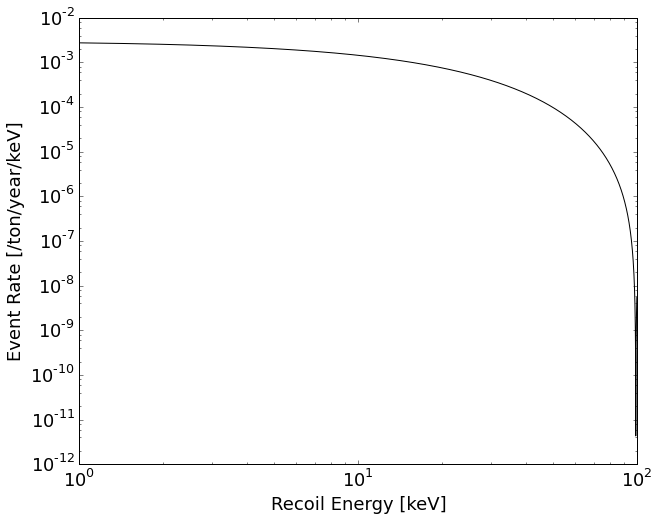

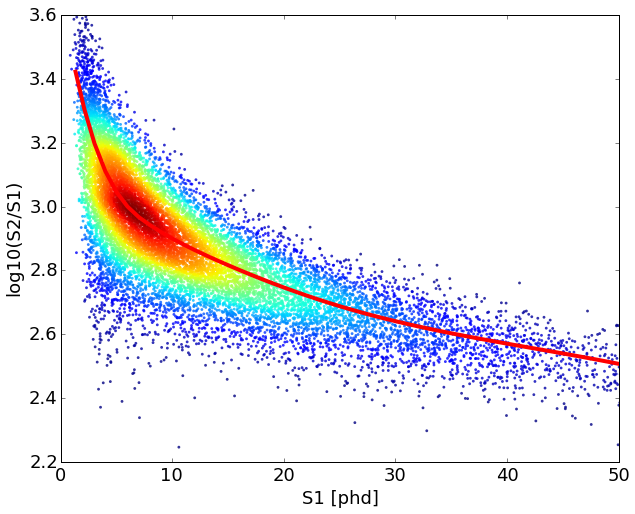

In [11]:
# ATM nu PDF
file_path='data/atm_Peter_update.txt' #caught a 2x error in rate
title='ATM'
ParticleType='NR'
nSim=2e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
LZ_count=size(S1_cut[S1_cut<20])/Det_exposure_factor
sig_LZ_count=sqrt(size(S1_cut[S1_cut<20]))/Det_exposure_factor
print('Count in LZ (0 to 20 S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )

<h1> B8 nu PDF </h1>

total between 1.00 and 4.40 keV = 0.000260662 [evts/kg/day]
Detector exposure factor = 1370.14
Count in LZ (0 to 20 S1) = 6.999 +/- 0.071


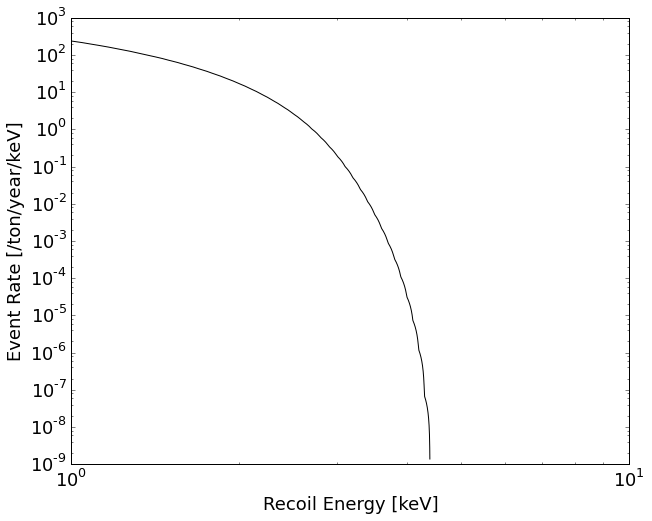

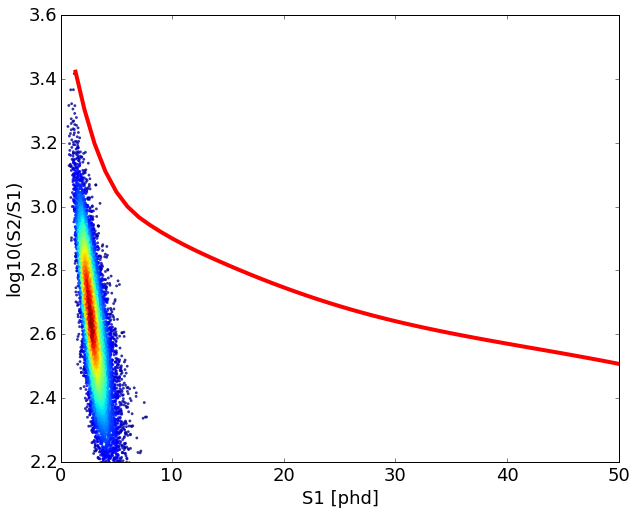

In [12]:
# B8 nu PDF
file_path='data/B8_Peter.txt' #caught a 2x error in rate
title='B8'
ParticleType='NR'
nSim=2e6

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
LZ_count=size(S1_cut[S1_cut<20])/Det_exposure_factor
sig_LZ_count=sqrt(size(S1_cut[S1_cut<20]))/Det_exposure_factor
print('Count in LZ (0 to 20 S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )

<h1> HEP nu PDF </h1>

total between 0.10 and 5.80 keV = 6.32879e-06 [evts/kg/day]
Detector exposure factor = 56431.5
Count in LZ (0 to 20 S1) = 0.231 +/- 0.002


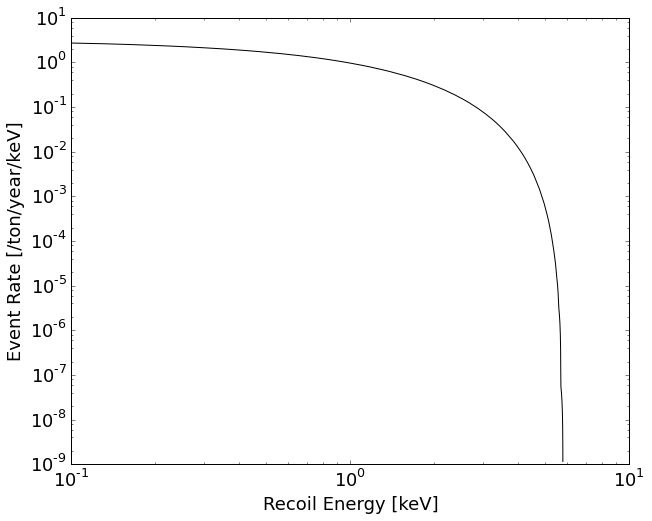

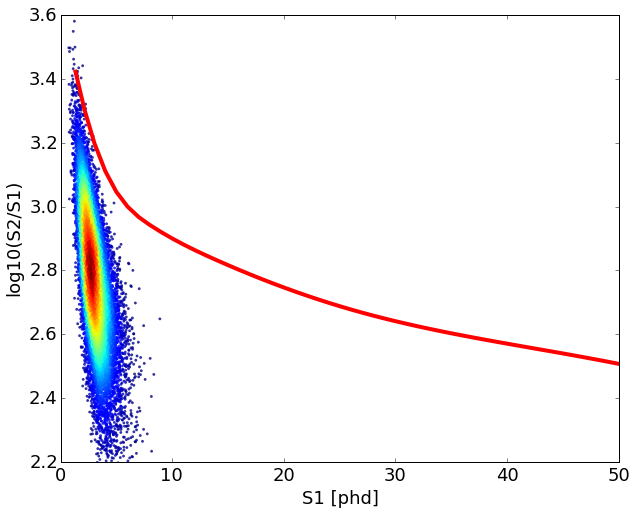

In [13]:
# HEP nu PDF
file_path='data/hep_Peter.txt' #caught a 2x error in rate
title='HEP'
ParticleType='NR'
nSim=2e6

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
LZ_count=size(S1_cut[S1_cut<20])/Det_exposure_factor
sig_LZ_count=sqrt(size(S1_cut[S1_cut<20]))/Det_exposure_factor
print('Count in LZ (0 to 20 S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )

<h1> DSN nu PDF </h1>

total between 0.10 and 118.35 keV = 1.21975e-07 [evts/kg/day]
Detector exposure factor = 146400
Count in LZ (0 to 20 S1) = 0.089 +/- 0.001


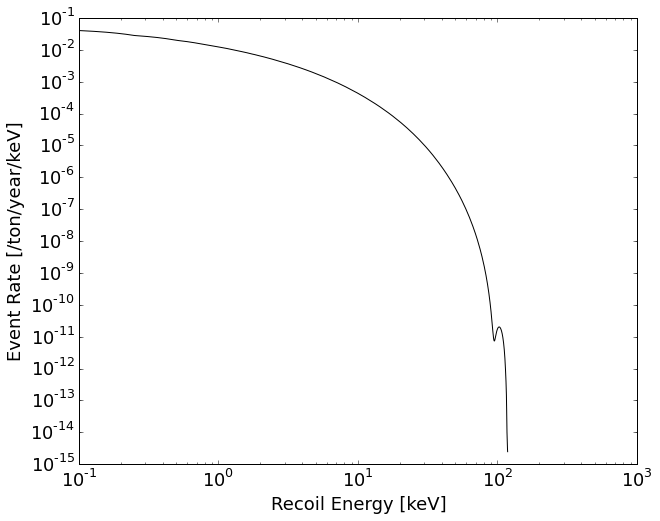

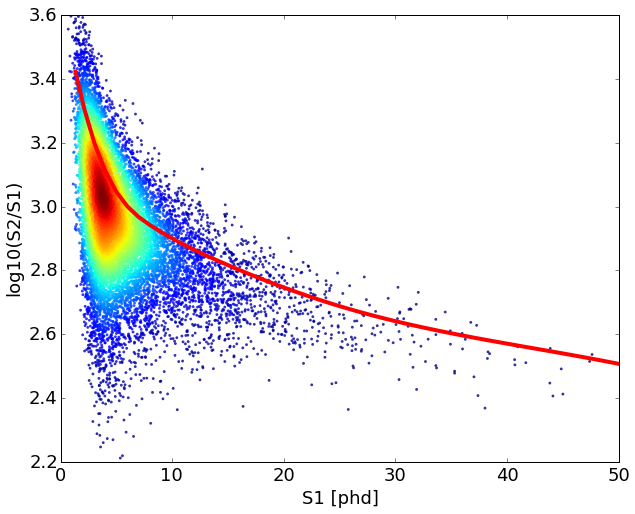

In [14]:
# DSN nu PDF
file_path='data/DSN_DiffRate.txt' #caught a 2x error in rate
title='DSN'
ParticleType='NR'
nSim=5e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
LZ_count=size(S1_cut[S1_cut<20])/Det_exposure_factor
sig_LZ_count=sqrt(size(S1_cut[S1_cut<20]))/Det_exposure_factor
print('Count in LZ (0 to 20 S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )

<h1> PP + 7 Be </h1>

total between 0.00 and 200.00 keV = 0.00110144 [evts/kg/day]
Detector exposure factor = 16.2126
Count in LZ (0 to 20 S1) = 277.315 +/- 4.136


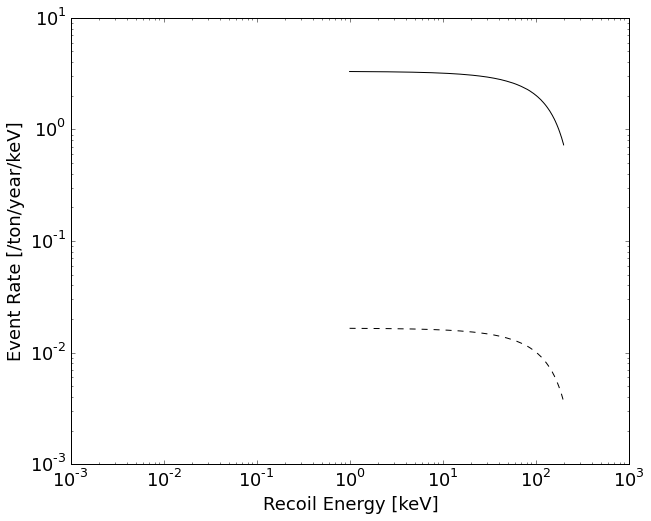

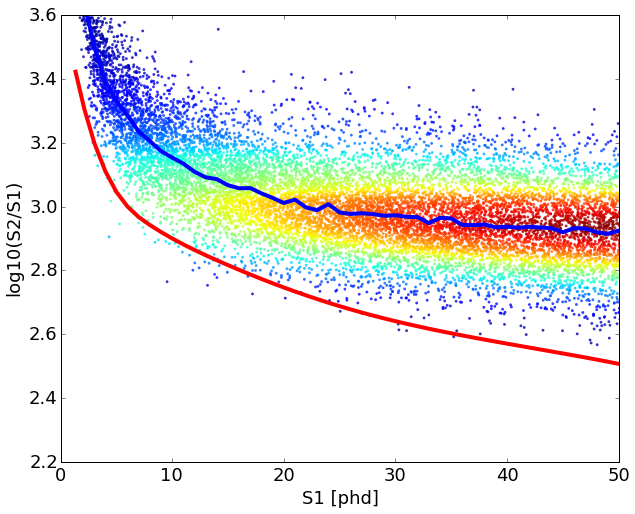

In [15]:
# PP nu PDF
file_path='data/PPsolarNu_Peter.txt' #caught a 2x error in rate
title='DSN'
ParticleType='ER'
nSim=5e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
LZ_count=size(S1_cut[S1_cut<20])/Det_exposure_factor
sig_LZ_count=sqrt(size(S1_cut[S1_cut<20]))/Det_exposure_factor
print('Count in LZ (0 to 20 S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )

<h1> Generate WIMP signal </h1>

total rate above 0.00 keV = 804495 [evts/kg/day per pb]
LZ exposure factor per pb = 4.43934e-08
total rate above 0.00 keV = 1.40673e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 1.01553e-08
total rate above 0.00 keV = 1.82237e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 3.91954e-09
total rate above 0.00 keV = 1.82844e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 1.95326e-09


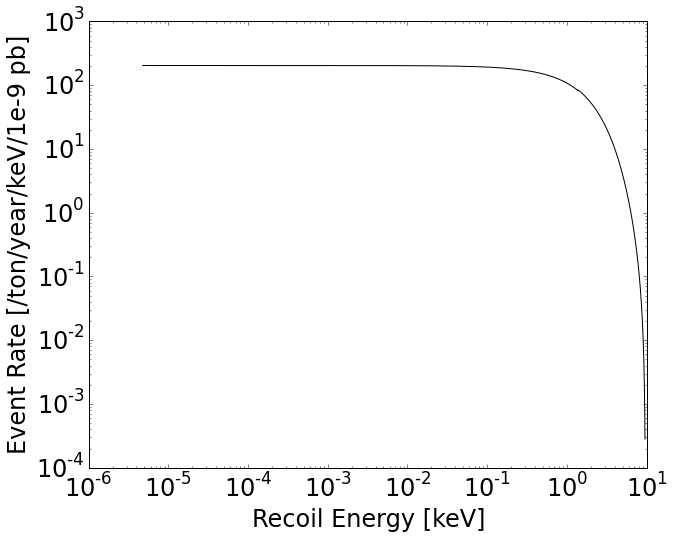

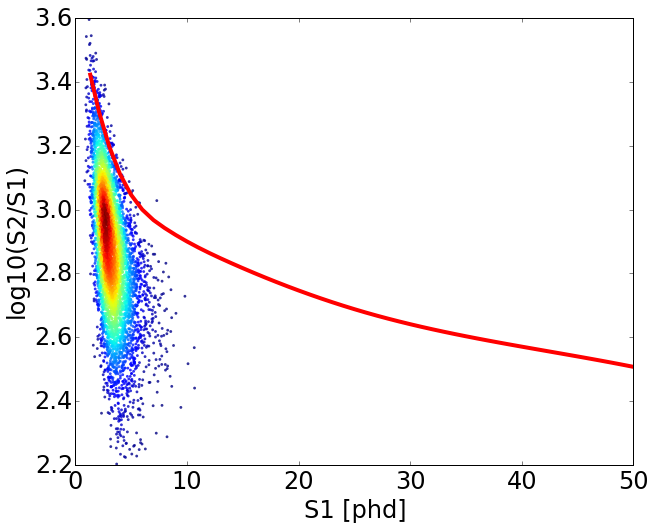

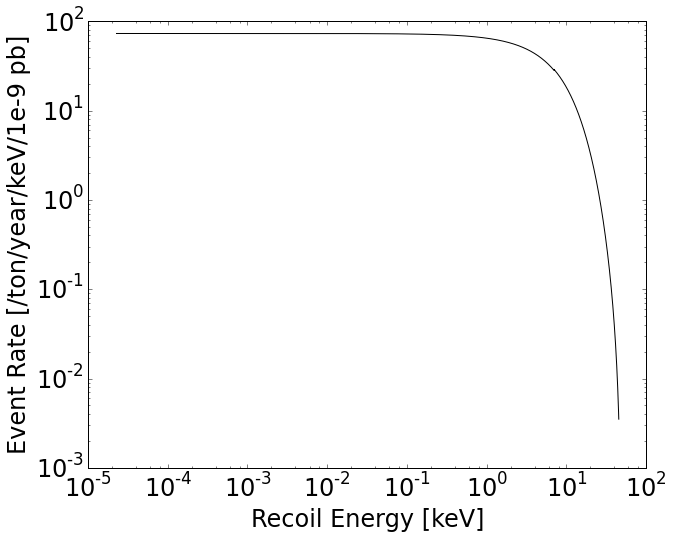

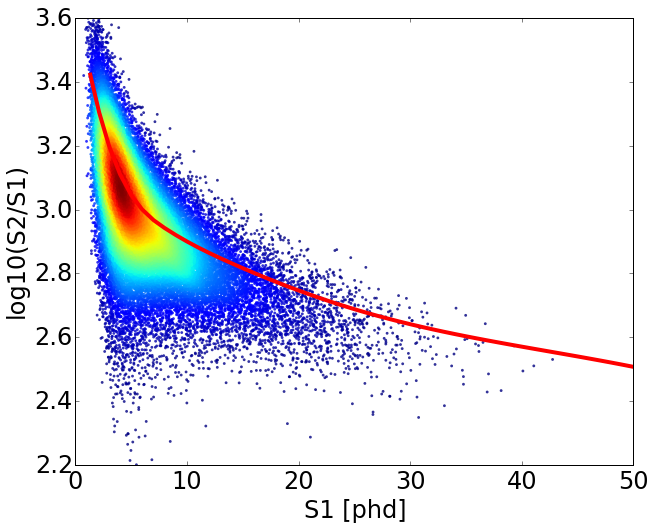

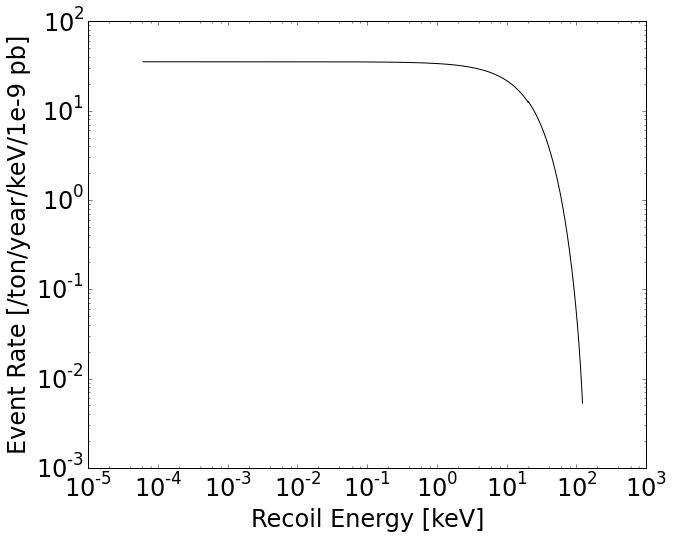

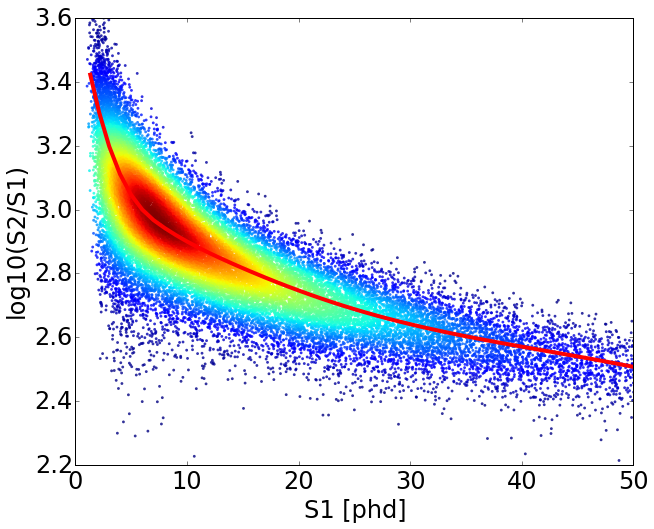

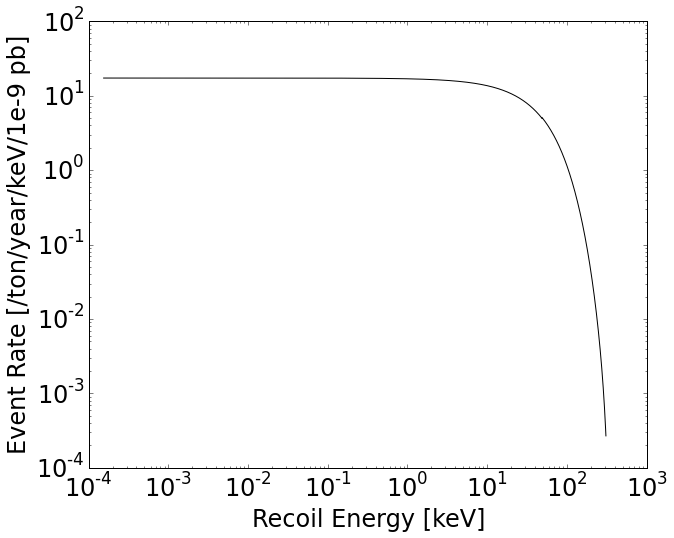

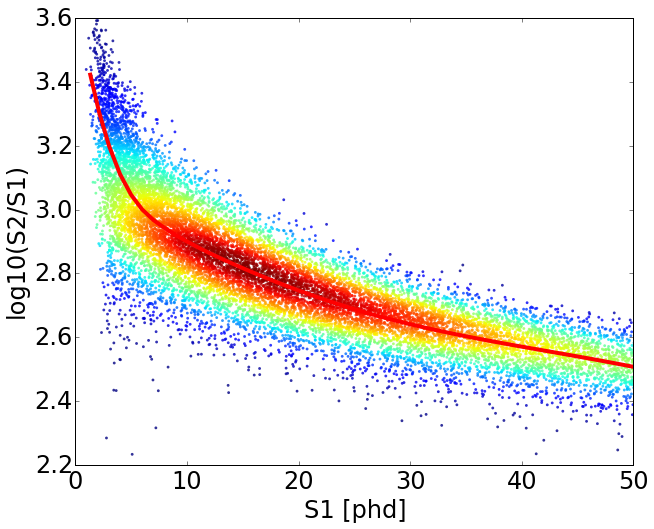

In [16]:
nSim=1e4
NEST=NEST_setup() #defult is LZ and NR

#Generate WIMPs
for mWmp,nSim in zip(int32([10,25,50,100]),int32([2e5,8e4,4e4,2e4])):
    Nph, Ne, S1, S2, S1c, S2c, WmpRate, Det_exposure_factor=WIMP2NphNe(NEST=NEST,mWmp=mWmp,nSim=nSim)
    # 1e-45 cm^2 cross section
    title='WIMP_M'+str(mWmp)

    WS_cut=(S1c>0) & (S2>=S2raw_min)
    S1_cut=S1c[WS_cut]
    S2_cut=S2c[WS_cut]

    #make a scatter plot
    plt.figure()
    scatterColor(S1_cut,log10(S2_cut/S1_cut))
    plt.xlabel('S1 [phd]')
    plt.ylabel('log10(S2/S1)')
    plt.rcParams.update({'font.size': 24})
    #plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
    #plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
    plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
    plt.xlim([0,50])
    plt.ylim([2.2,3.6])
    savefig('figs/'+title+'_S2S1.png')


<h1> Check NR interpolation </h1>

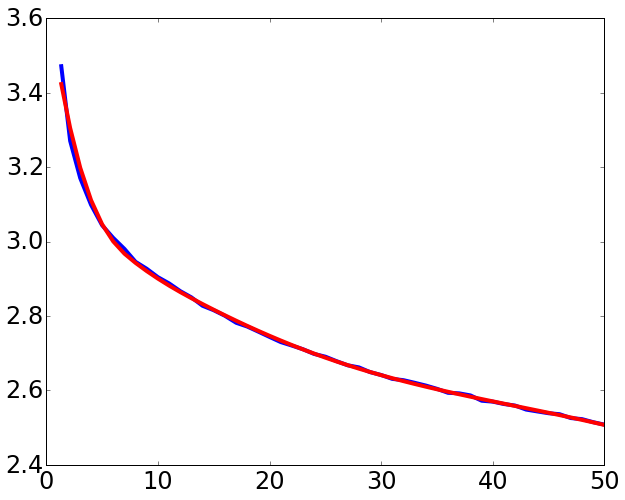

In [17]:
plot(S1_bin_cen_n,mean_S2oS1_n,'-b',linewidth=4)
#get NR mean, with a smooth spline
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.005)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)